In [5]:
#Autor: Alma
import pandas as pd
from datetime import datetime
import time

pd.set_option("expand_frame_repr", False)
df_gfi = pd.read_csv('./../gfi_coll.csv',usecols=['created_at','repository_url','url'])

df_contri_rep= pd.read_csv('./../contri_rep.csv',usecols=['url'])
df_all_rep= pd.read_csv('./../all_rep.csv',usecols=['stargazers_count','url'])
df_gfi['created_at'] = pd.to_datetime(df_gfi['created_at'])


df_gfi_exclued_years = df_gfi[(df_gfi['created_at'] >= '2010-1-1') & (df_gfi['created_at'] <= '2020-1-1')]
print(df_gfi_exclued_years['created_at'].max())
# print(df_contri_rep.shape)

2019-12-29 23:14:15+00:00


In [6]:
import numpy as np
# first_issues_count = df_gfi.groupby('repository_url').agg(total_first = pd.NamedAgg('repository_url',aggfunc='count'))
cont_detail = pd.merge(left=df_contri_rep,right=df_all_rep, how="inner",left_on='url',right_on='url')
cont_detail = cont_detail.reindex(sorted(cont_detail.columns), axis=1)
unique_cont_df = cont_detail.drop_duplicates(subset=['url'], keep='first')
print(cont_detail.shape)
print(unique_cont_df.shape)

(1144, 2)
(1099, 2)


In [10]:
# df_all_iss_unique = pd.DataFrame(df_gfi['repository_url'].unique(), columns=['url'])
df_iss_id_unique = df_gfi_exclued_years.drop_duplicates(subset=['url'], keep='first')
print(df_iss_id_unique.shape)
print(df_gfi_exclued_years.shape)
df_all_iss_unique = pd.DataFrame(df_gfi_exclued_years['repository_url'].unique(), columns=['url'])
print(df_all_iss_unique.shape)
ratio=[]

for i, g  in unique_cont_df.groupby(np.arange(len(unique_cont_df)) // 40):
    # print(g)
    gfi_rep = pd.merge(left=g,right=df_all_iss_unique, how="inner",left_on='url',right_on='url')    
    # print(i,gfi_rep.shape[0]/40 )
    if(i==16):
        gr = g
    ratio.append(gfi_rep.shape[0]/40)

# gr.to_csv('outlier.txt', index=False) 
ratio = [i for i in ratio if i != 0]

print(ratio)

(1529, 3)
(1531, 3)
(174, 1)
[0.3, 0.225, 0.225, 0.225, 0.15, 0.25, 0.175, 0.225, 0.2, 0.075, 0.2, 0.15, 0.125, 0.225, 0.15, 0.2, 0.275, 0.2, 0.2, 0.025, 0.05, 0.125, 0.025, 0.025, 0.05, 0.175, 0.075, 0.025]


28


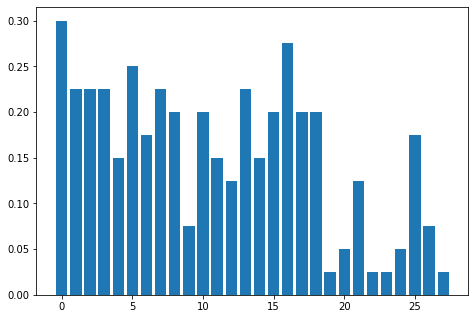

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# langs = ['C', 'C++', 'Java', 'Python', 'PHP']
# students = ratio[0:19]
print(len(ratio))
x= range(0,len(ratio))

ax.bar(x,ratio)
plt.show()
